In [83]:
#import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

### 1. Import Data

In [2]:
df = pd.read_csv('lego.csv')
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [3]:
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


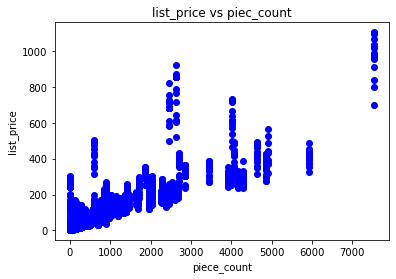

In [6]:
# price/piece_count Visualization
plt.scatter(df['piece_count'], df['list_price'], color = "blue")
plt.title("list_price vs piece_count")
plt.xlabel("piece_count")
plt.ylabel("list_price")

plt.show()

##### Notes:

There seems to be a clear correlation between price and piece count.

## Simple linear regression

### 1. Define the variables

In [23]:
# variables (simple linear regression)
y = df["list_price"].values.reshape(-1, 1) 
x = df["piece_count"].values.reshape(-1, 1)
 

### 2. Split the data set

In [22]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=1)

##### a) Why do we need to create train and test data?

We split the data into to train and test so that we are able to test the quality of the model.

##### b) How does this improve our results?

We do so because it allows us to test our model against the split of the data that was not used to train the model. This allows us to test the quality of the model

### 3. Run a simple linear equation

In [45]:
# run linear regression
lr = LinearRegression()

# fit the model on the training data
lr.fit(x_train, y_train)

# predict is used for predicting on the x_test
y_pred_lr = lr.predict(x_train)

In [46]:
# print the R-squared value
print(lr.score(x_train,y_train)*100)

75.69739612103157


In [47]:
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

Intercept value:  [17.51265789]
Coffecient value:  [[0.09609344]]


#### Notes:
- The R-squared tells us that the model is explaining over 75% of the values.
- The coffecient value of 0.096 tells us that as the independent variable increases by 1, the predicted value of list_price increases by 0.096.

In [48]:
# simple linear regression MAE, MSE, R squared.

meanAbErr = metrics.mean_absolute_error(y_train, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_lr)

print('R squared: {:.2f}'.format(lr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.62
Mean Absolute Error: 20.084732177020527
Mean Square Error: 1934.1469402177052


### 4. Simple linear regression prediction

What is the predicted list price for 8000 piece lego?


In [49]:
# Predicted list price when the lego set has 8000 pieces
print(lr.predict([[8000]]))

[[786.26020805]]


 #### Notes: 
 
 The model predicts that the price for a lego set with 8000 pieces is $786.26

## Multiple linear regression

### 1. Define the variables

In [94]:
# variables (multiple linear regression)
y = df["list_price"]
X = df[["piece_count","ages"]]

### 2. Split the data set

In [95]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train,y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

### 3. Run a multiple linear regression

In [96]:
# run linear regression
mlr = linear_model.LinearRegression()

# fit the model on the training data
mlr.fit(x_train, y_train)

# predict is used for predicting on the x_test
y_pred_mlr = mlr.predict(x_train)

In [97]:
# print the R-squared value
print(mlr.score(x_train,y_train)*100)

75.69883012077334


In [70]:
print("Intercept value: ", mlr.intercept_)
print("Coffecient value: ", mlr.coef_)

Intercept value:  [16.80346233]
Coffecient value:  [[0.09613004 0.04135372]]


#### Notes:
- The R-squared tells us that the model is explaining over 75.69% of the values.
- The coffecient value of 0.096 for the pieces_count tells us that as this independent variable increases by 1, the predicted value of list_price increases by 0.096. 
- As the second independent variable increases by 1 the prices increases by 0.04

In [71]:
meanAbErr = metrics.mean_absolute_error(y_train, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_train, y_pred_mlr)

print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 75.62
Mean Absolute Error: 20.076668286657355
Mean Square Error: 1934.0328139196909


explain mean absolute error!!!

### 3. Check the model with OLS

In [86]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 1.336e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        22:37:47   Log-Likelihood:                -44649.
No. Observations:                8582   AIC:                         8.930e+04
Df Residuals:                    8579   BIC:                         8.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8035      1.141     14.731      0.0

### 4. multiple linear regression prediction

What is the predicted list price of Lego product with the 8000 Lego pieces that are most likely to be purchased by 30-year-old customers? (Multiple linear regression).


In [73]:
New_Value1 = 8000
New_Value2 = 30
print ('Predicted Value: \n', mlr.predict([[New_Value1 ,New_Value2]])) 

Predicted Value: 
 [[787.08439325]]


#### Notes:

The model predicts that lego products with 8000 pieces most likley purchased by 30 year olds will cost $787.08



In [93]:
# check multicollinearity
x_temp = sm.add_constant(x_train)# multicollinearity

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [88]:
model = sms.het_breuschpagan(model.resid, model.model.exog) # heteroscedasticity

In [89]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 655.3443919662843, 'LM Test p-value': 4.940528528275746e-143, 'F-stat': 354.6388172194978, 'F-test p-value': 1.043749315788897e-148}


explain hetroscedasticity!!!